In [1]:
%matplotlib inline

In [2]:
import numpy as np
import gpitch
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16, 3)
import warnings; warnings.simplefilter('ignore')
import tensorflow as tf
import gpflow

In [3]:
tf.__version__

'1.2.1'

In [4]:
gpflow.__version__

'0.5'

In [5]:
filename = 'MAPS_MUS-bach_846_AkPnBcht.wav'  # audio file to analyze
pitch = [60, 64, 67, 72, 76]
# pitch = range(21, 109)
print pitch

[60, 64, 67, 72, 76]


In [6]:
m = gpitch.transcription.AMT(pitches=pitch, test_filename=filename, nsec=2, gpu='1', window_size=882, 
                             reg=True, overlap=False)

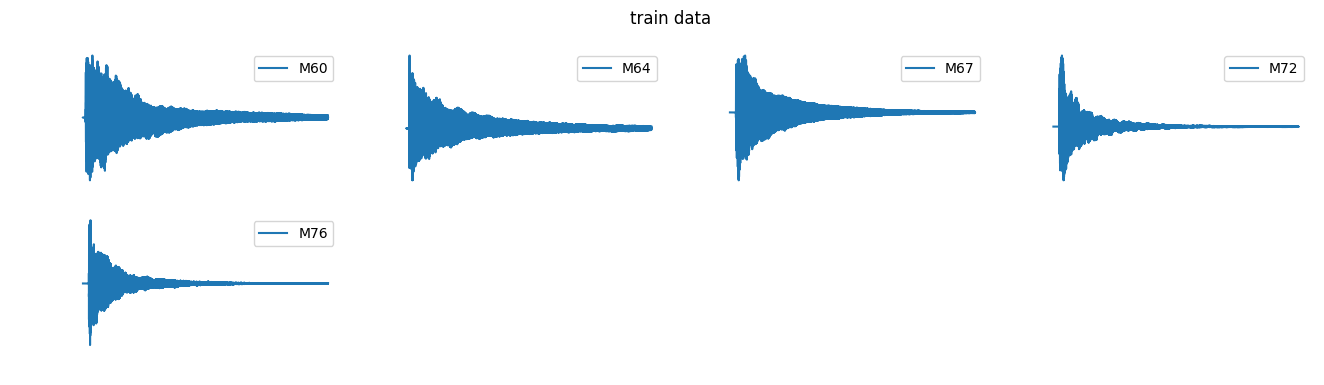

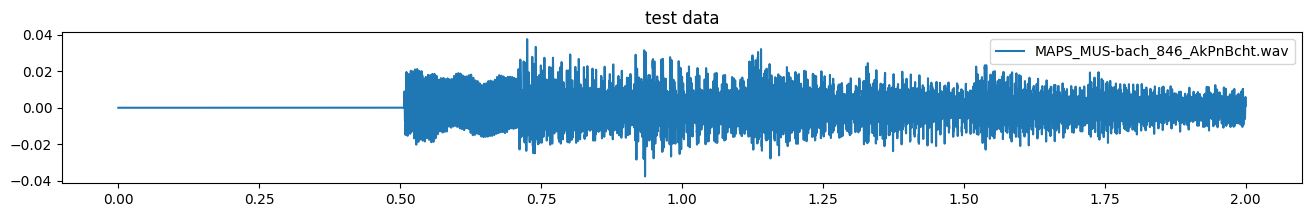

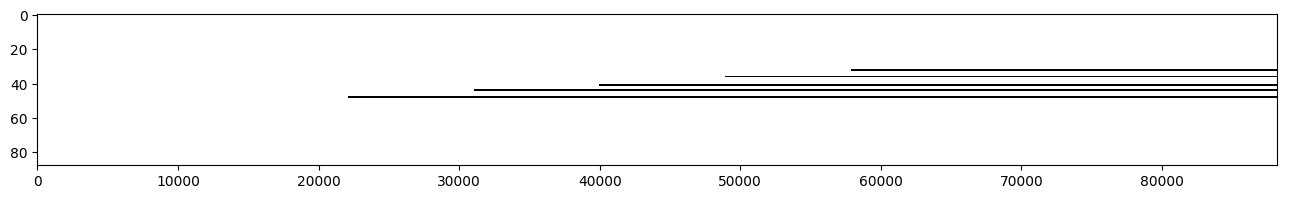

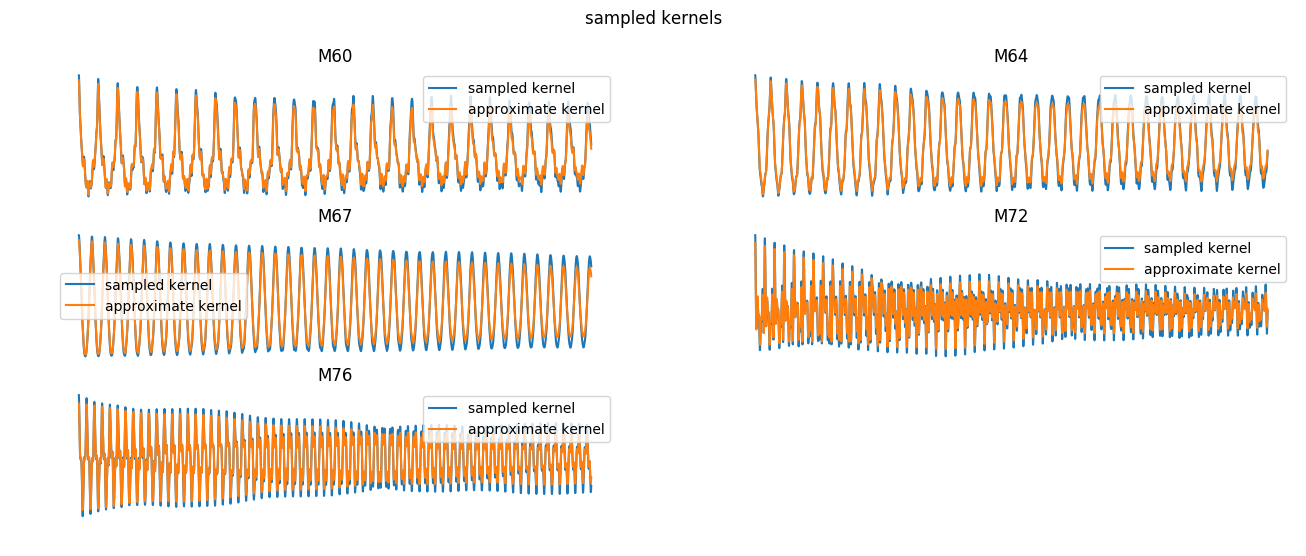

In [7]:
m.plot_traindata()
m.plot_testdata(axis_off=False)
m.plot_kernel()

number of inducing variables: 40


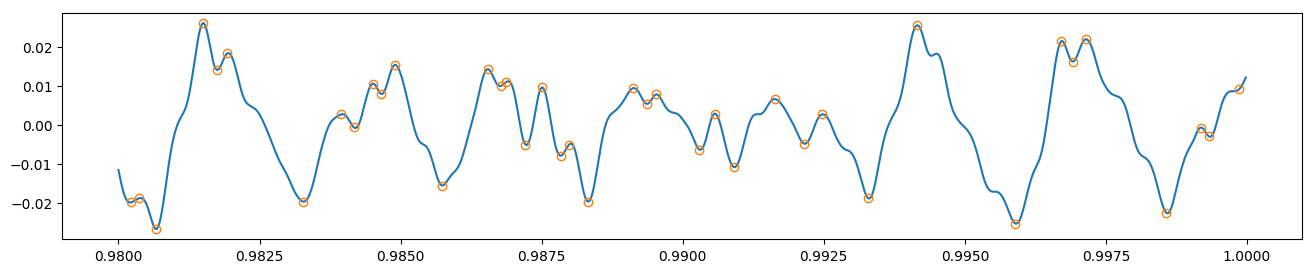

In [8]:
w = 49
plt.plot(m.test_data.X[w], m.test_data.Y[w])
plt.plot(m.inducing[0][w], m.inducing[1][w], 'o', mfc="none")
print("number of inducing variables: {0}".format(m.inducing[1][w].size))
# plt.xlim(0.61, 0.62)

In [9]:
m.optimize(disp=1, maxiter=100)

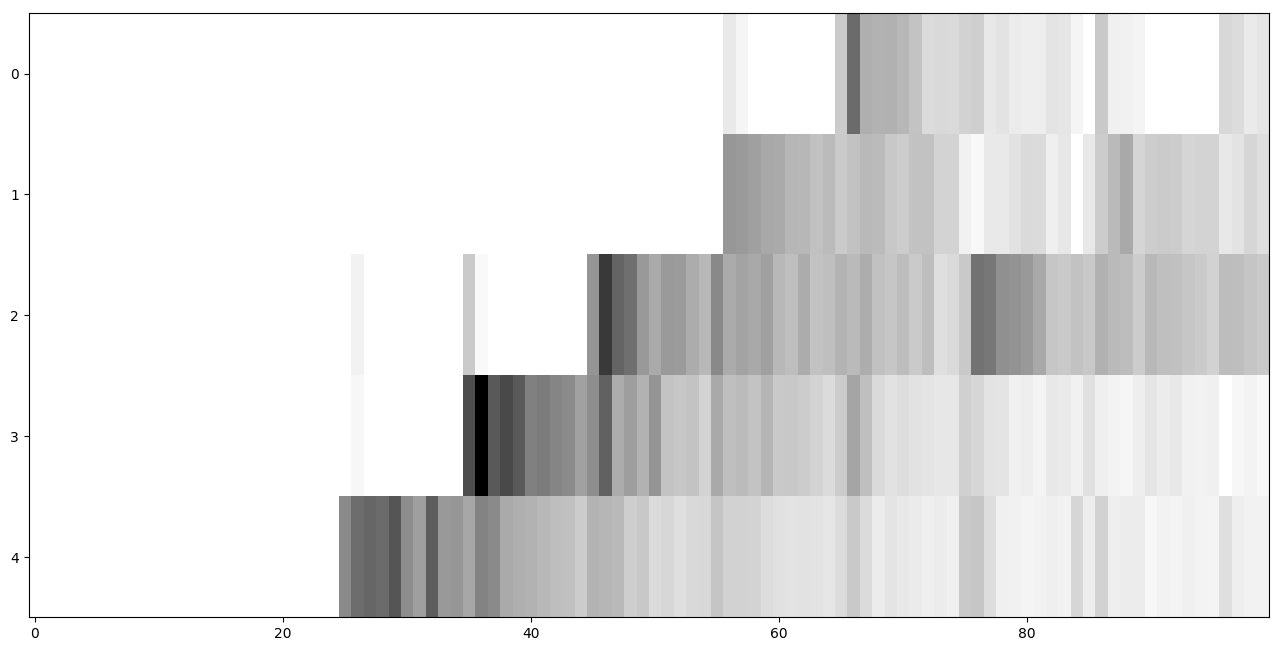

In [10]:
sd_matrix = np.sqrt(np.flipud(m.matrix_var))
#sd_matrix = np.flipud(m.matrix_var)

plt.figure(figsize=(16, 8))
plt.imshow(sd_matrix, cmap=plt.cm.get_cmap('binary'), aspect="auto");
plt.savefig("pr.png")

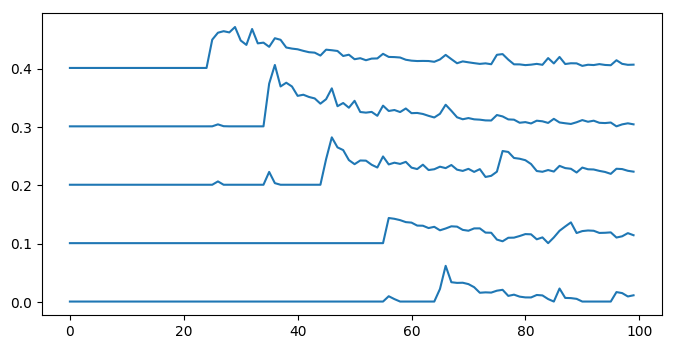

In [11]:
plt.figure(figsize=(8,4))
for i in range(sd_matrix.shape[0]):
    plt.plot(0.1*i + sd_matrix[i, :], "C0")

In [12]:
m.model.kern.var_vector

Name,values,prior,constraint
var_vector.item0,[ 4.39790090e-05],None,+ve
var_vector.item1,[ 1.96264365e-05],None,+ve
var_vector.item2,[ 0.00054859],None,+ve
var_vector.item3,[ 0.00021255],None,+ve
var_vector.item4,[ 0.00013733],None,+ve


In [13]:
# plt.figure(figsize=(16, 8))
# plt.imshow(m.piano_roll.compute_periodogram(), cmap=plt.cm.get_cmap('binary'), aspect="auto");
# plt.savefig("pr_ground.png")